In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\operator\Documents\python\salary_dataset.csv', header=0)
df = df.drop(columns=['Unnamed: 0'])
df.columns = df.columns.str.replace(' ', '_')

In [3]:
df

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


#### 1. Проведите оценку данных по столбцам, посмотрите визуально на распределение данных, определите базовые статистики, где это возможно.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education_Level      6701 non-null   object 
 3   Job_Title            6702 non-null   object 
 4   Years_of_Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 419.1+ KB


In [5]:
# Словарь с делением признаков исходных данных на два вида для упрощения построения групп графиков:

col_type = {'numerical' : ['Age', 'Years_of_Experience', 'Salary'],
            'text' : ['Gender', 'Education_Level', 'Job_Title', 'Country', 'Race']}

##### 1.1 Анализ числовых признаков

In [6]:
# Посмотрим основные числовые метрики встроенным в Pandas методом:

df.describe().round(2)

,Age,Years_of_Experience,Salary
count,6702.00,6701.00,6699.00
mean,33.62,8.09,115326.96
std,7.61,6.06,52786.18
min,21.00,0.00,350.00
25%,28.00,3.00,70000.00
50%,32.00,7.00,115000.00
75%,38.00,12.00,160000.00
max,62.00,34.00,250000.00


In [7]:
df

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [8]:
avg_dict = {}
for col in col_type['numerical']:
  mean = df[col].mean()
  median = df[col].median()
  moda = df[col].round().mode().tolist()[0]
  avg_dict[col] = [mean, median, moda]

df_avg = pd.DataFrame(avg_dict, index=['Mean', 'Median', 'Mode'])

In [9]:
df

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [10]:
df_avg

,Age,Years_of_Experience,Salary
Mean,33.620859,8.094687,115326.964771
Median,32.000000,7.000000,115000.000000
Mode,27.000000,2.000000,140000.000000


In [11]:
# Функция для построения Гистограмм (для числовых данных)

def draw_hist(df, col_name):
  fig, ax = plt.subplots(figsize=(10, 7.5))

  if ((col_name == 'Age') | (col_name == 'Years_of_Experience')):
    bins_num=df[col_name].nunique()-2
  elif (col_name == 'Salary'):
    bins_num=50


  ax.hist(df[col_name].round(), bins=bins_num)


  ax.set_ylabel(f'Кол-во записей')
  ax.set_xlabel(f'{col_name}')
  ax.set_title(f'Распределение данных по признаку {col_name}')
  plt.tick_params(axis='x', rotation=30)
  ax.grid(axis='y')

  plt.show()

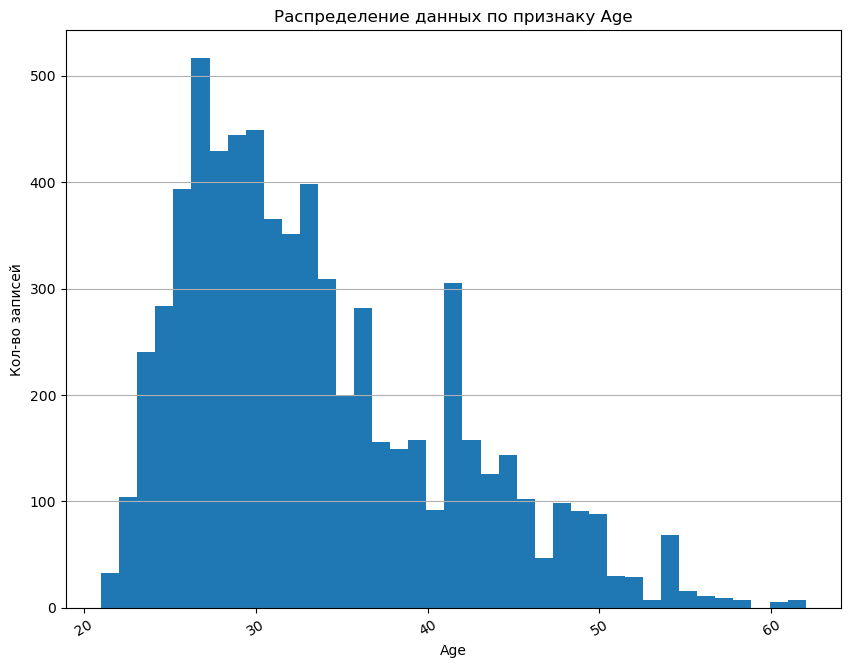

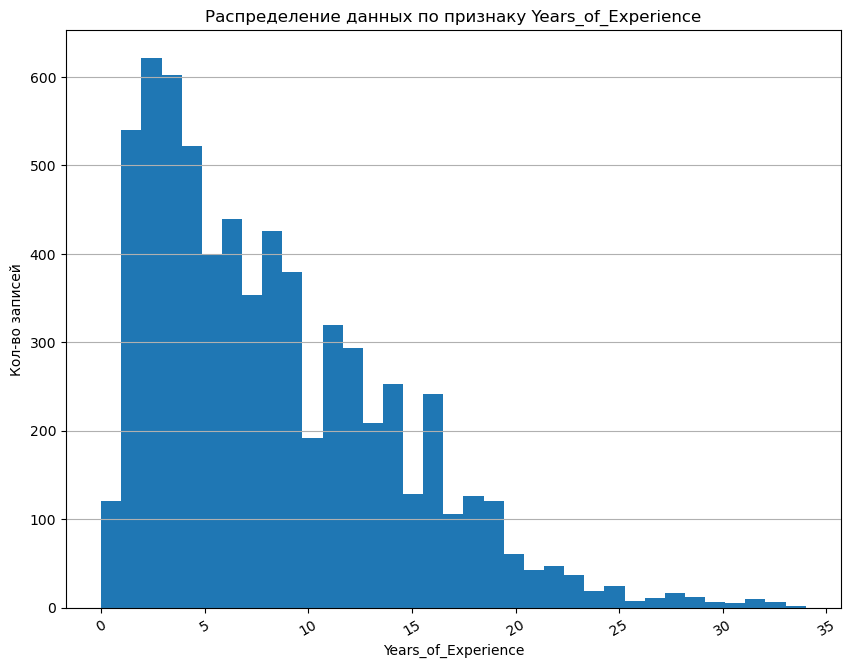

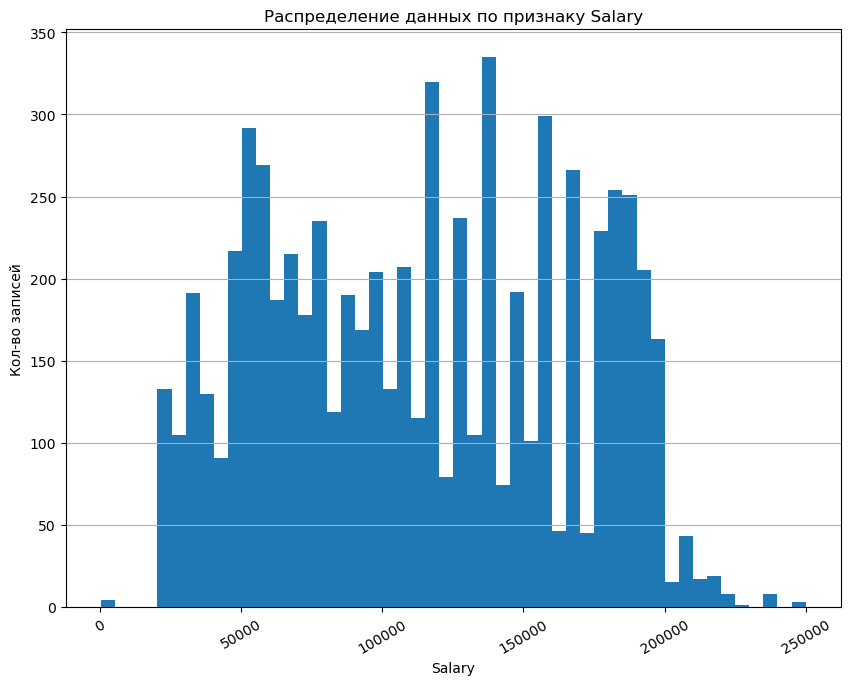

In [12]:
# Посмотрим графически на распределение данных по разным признакам:

for col in col_type['numerical']:
  draw_hist(df=df, col_name=col)

##### 1.2 Анализ текстовых признаков

In [13]:
# Посмотрим количество уникальных значений

for col in col_type['text']:
  unique_count = df[col].str.lower().nunique()
  print(f'В колонке {col} было найдено {unique_count} уникальных значений')

# Как мы видим, в колонке Job_Title уникальных данных довольно много, поэтому
# мы не будем строить по данному признаку график.

col_type['text'].remove('Job_Title')

В колонке Gender было найдено 3 уникальных значений
В колонке Education_Level было найдено 6 уникальных значений
В колонке Job_Title было найдено 192 уникальных значений
В колонке Country было найдено 5 уникальных значений
В колонке Race было найдено 10 уникальных значений


In [14]:
# В колонке Education_Level пристутствуют группы наименований, обозначающих
# один и тот же смысл, но различающихся по написанию - сгруппируем их вместе:

df['Education_Level'] = df['Education_Level'].str.lower()
df.loc[(~df['Education_Level'].isnull()) &
 (df['Education_Level'].str.contains('high school')), 'Education_Level'] = "High School"
df.loc[(~df['Education_Level'].isnull()) &
 (df['Education_Level'].str.contains('bachelor')), 'Education_Level'] = "Bachelor's Degree"
df.loc[(~df['Education_Level'].isnull()) &
 (df['Education_Level'].str.contains('master')), 'Education_Level'] = "Master's Degree"
df.loc[(~df['Education_Level'].isnull()) &
 (df['Education_Level'].str.contains('phd')), 'Education_Level'] = "PhD"

In [15]:
# Функция для построения Бар-чартов (для текстовых данных)

def draw_bar_chart(df, col_name):
  fig, ax = plt.subplots(figsize=(10, 7.5))

  df = pd.DataFrame(df[col_name]. \
                    value_counts(). \
                    reset_index())
  x = df[col_name]
  y = df['count']

  ax.bar(x, y)

  ax.set_ylabel(f'Кол-во записей')
  ax.set_title(f'Состав данных в разбивке по признаку {col_name}')

  for i in range(df.shape[0]):
    plt.text(i, df.iloc[i, 1] + df['count'].max()*0.03, df.iloc[i, 1],
             horizontalalignment='center', verticalalignment='top')
  plt.tick_params(axis='x', rotation=30)

  plt.show()

In [16]:
col_name = 'Gender'
df1 = pd.DataFrame(df[col_name]. \
                    value_counts(). \
                    reset_index())
#. \
            
                    #rename(columns={'index' : col_name,
                                    #col_name : 'count'}))

In [17]:
df1

,Gender,count
0,Male,3674
1,Female,3014
2,Other,14


In [18]:
col_type

{'numerical': ['Age', 'Years_of_Experience', 'Salary'],
 'text': ['Gender', 'Education_Level', 'Country', 'Race']}

Gender


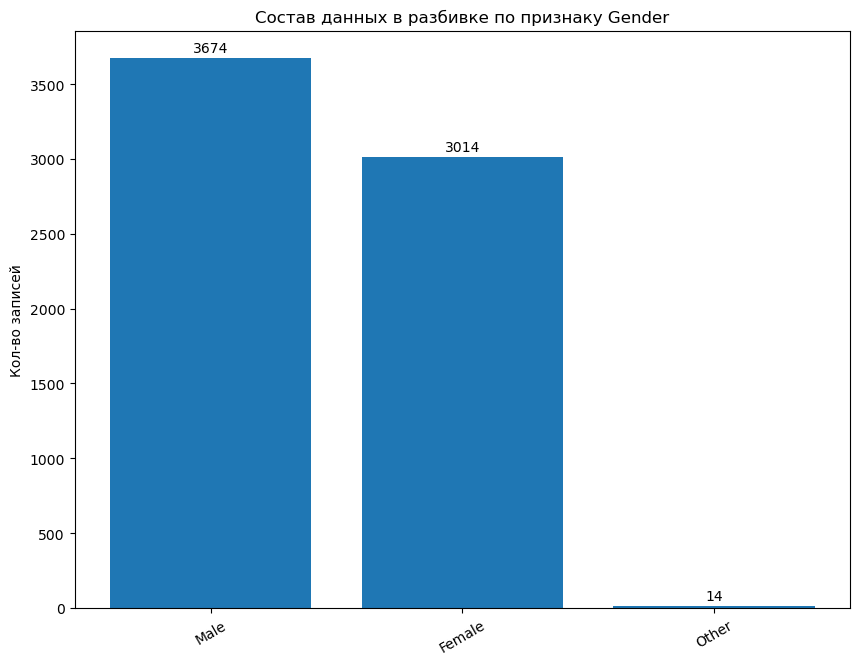

Education_Level


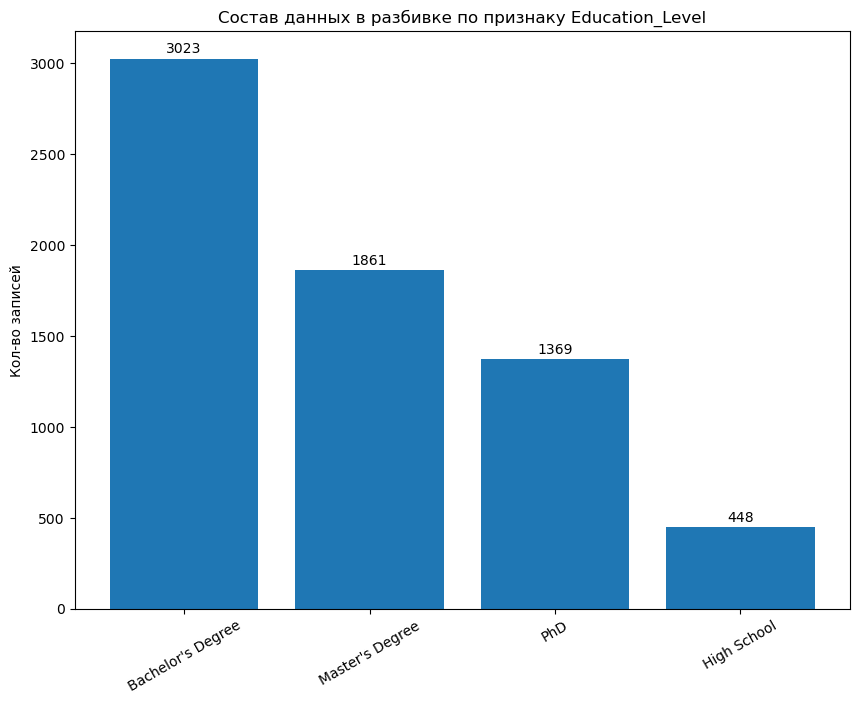

Country


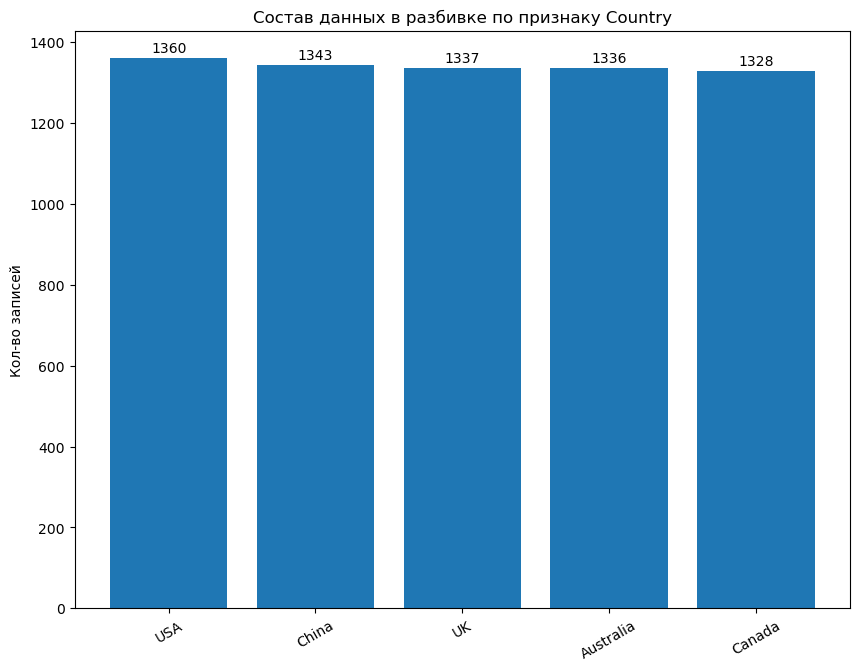

Race


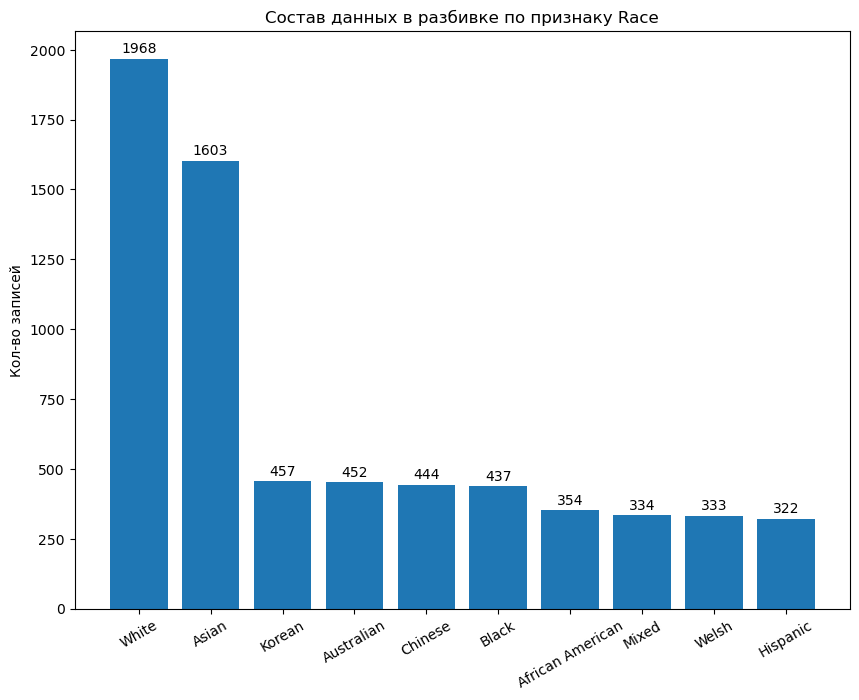

In [19]:
# Посмотрим графически на распределение данных по разным признакам:

for col in col_type['text']:
    print(col)
    draw_bar_chart(df=df, col_name=col)

#### 2. Найдите выбросы в данных, для наглядности используйте соответствующие типы визуализаций. Попробуйте объяснить их появление в наборе.

In [20]:
# Функция для построения "Ящика с усами" (для нахождения выбросов)

def draw_box(df, col_name):
  fig, ax = plt.subplots(figsize=(10, 7.5))

  df = df.loc[~df[col_name].isnull()][col_name]

  ax.boxplot(df, vert = 0)

  ax.set_xlabel(f'{col_name}')
  ax.set_title(f'Распределение данных по признаку {col_name}')

  plt.show()

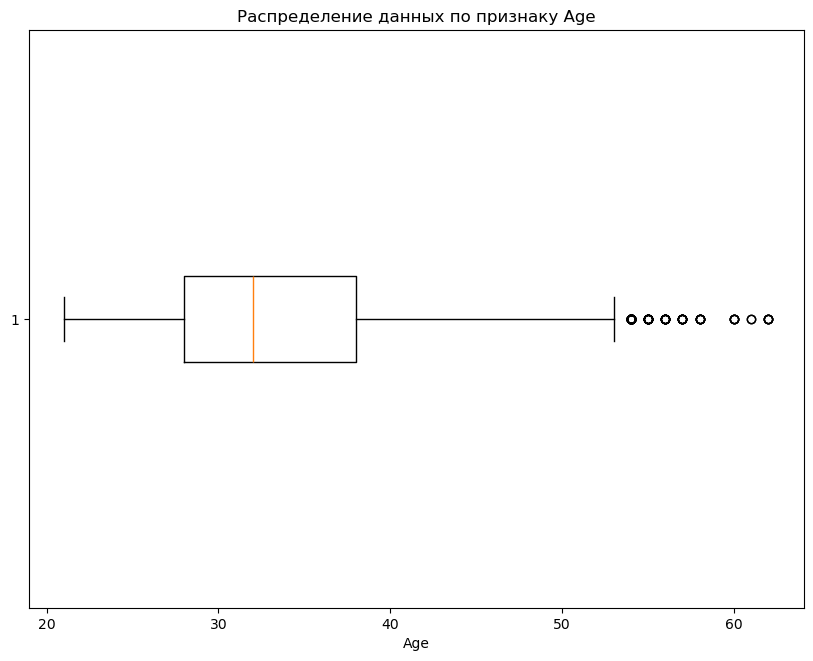

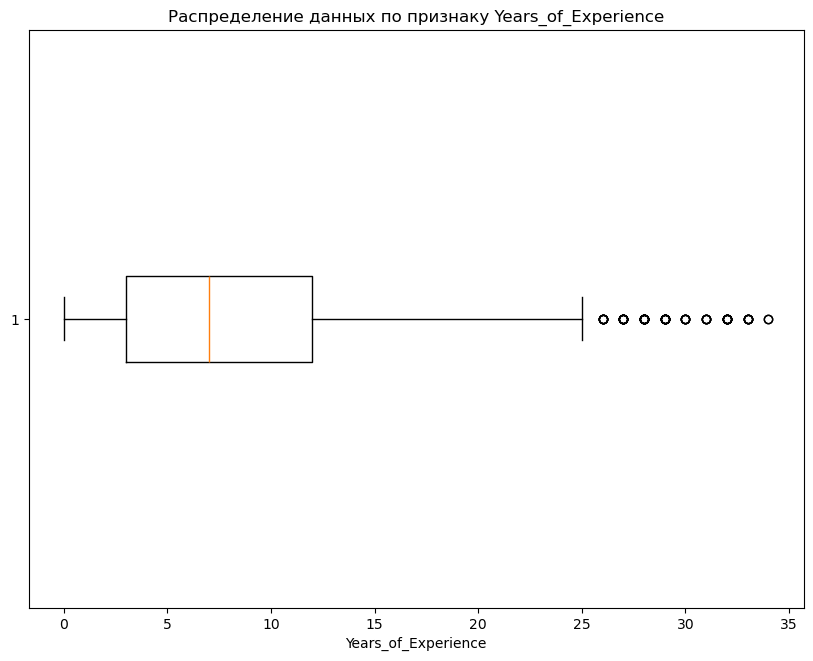

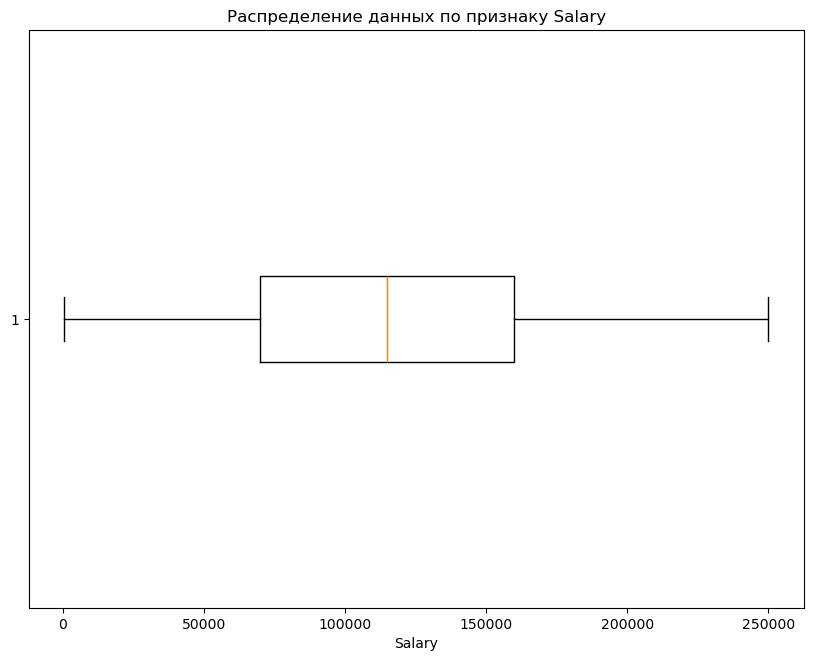

In [21]:
for col in col_type['numerical']:
  draw_box(df=df, col_name=col)

In [22]:
for col in col_type['numerical']:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  low_bound = q1 - 1.5 * iqr
  high_bound = q3 + 1.5 * iqr
  outl = df.loc[(df[col] < low_bound) | (df[col] > high_bound)].shape[0]
  print(f'Данные для признака {col} :')
  print(f'1-й квартиль - {q1}')
  print(f'3-й квартиль - {q3}')
  print(f'Границы определения выбросов - [{low_bound}, {high_bound}]')
  print(f'Кол-во выбросов - {outl}')
  print('-------------------------------------------------')

  # Как можно заметить из ранее представленных графиков распределения признаков
  # Age и Years_of_Experience, данные по ним распределены не симметрично, и
  # смещены влево, поэтому данный метод определения выбросов сюда не особо
  # хорошо применим. Других методов определения выбросов, особенно для
  # несимметричных данных, я пока не знаю. А с визуальной точки зрения, я бы
  # не стала обозначать какие-то из присутствующих данных как выбросы.

Данные для признака Age :
1-й квартиль - 28.0
3-й квартиль - 38.0
Границы определения выбросов - [13.0, 53.0]
Кол-во выбросов - 123
-------------------------------------------------
Данные для признака Years_of_Experience :
1-й квартиль - 3.0
3-й квартиль - 12.0
Границы определения выбросов - [-10.5, 25.5]
Кол-во выбросов - 75
-------------------------------------------------
Данные для признака Salary :
1-й квартиль - 70000.0
3-й квартиль - 160000.0
Границы определения выбросов - [-65000.0, 295000.0]
Кол-во выбросов - 0
-------------------------------------------------


#### 3. Задайте 4-6 вопросов к вашим данным и постарайтесь ответить на них графически (один вопрос/гипотеза — один график).

##### 3.1. Коррелируют ли между собой признаки Age и Years_of_Experience ?

In [23]:
# Функция для построения Scatter plot (для анализа взаимосвязи между признаками)

def scatter_plot(df, col_name1, col_name2):
  fig, ax = plt.subplots(figsize=(10, 7.5))

  df = df.loc[(~df[col_name1].isnull()) &
   (~df[col_name2].isnull())][[col_name1, col_name2]]

  x = df[col_name1]
  y = df[col_name2]

  ax.scatter(x, y)

  ax.set_xlabel(f'{col_name1}')
  ax.set_ylabel(f'{col_name2}')
  ax.set_title(f'2D Распределение данных по признакам {col_name1} и {col_name2}')

  plt.show()

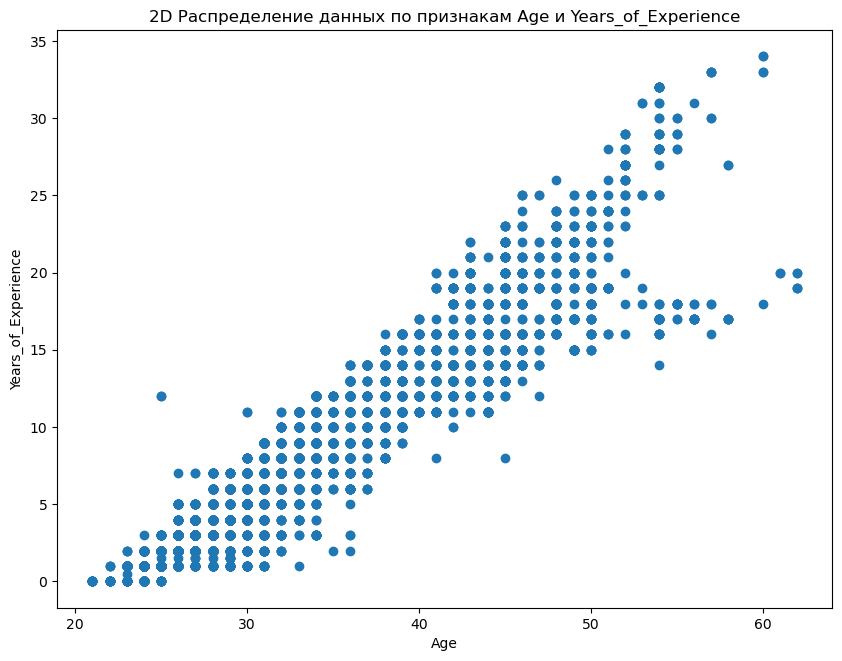

In [24]:
scatter_plot(df, 'Age', 'Years_of_Experience')

In [25]:
# Посчитаем коэффициент корреляции:

df_temp = df.loc[(~df['Years_of_Experience'].isnull()) &
   (~df['Age'].isnull())][['Age', 'Years_of_Experience']]

x = df_temp['Age']
y = df_temp['Years_of_Experience']

corr_coeff = np.corrcoef(x, y)
print(f'Коэффициент корреляции между признаками Age и Years_of_Experience : {corr_coeff[0][1].round(2)}')

# Как и следовало ожидать, признаки Age и Years_of_Experience сильно
# и положительно коррелируют (чем больше возраст человека, тем больше опыта
# работы он имеет и может иметь (и наоборот))

Коэффициент корреляции между признаками Age и Years_of_Experience : 0.94


##### 3.2. Коррелируют ли между собой признаки Age и Salary ?

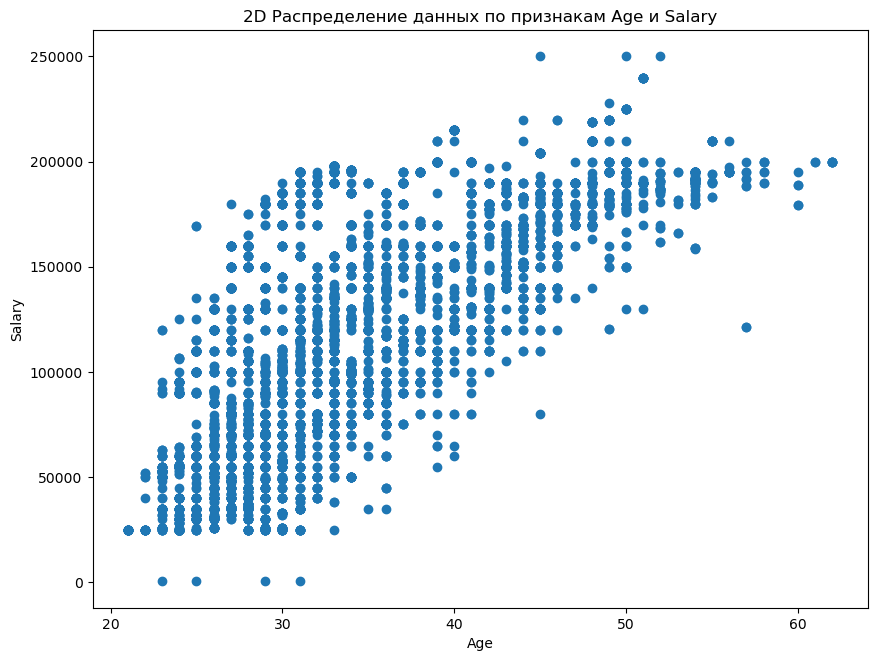

In [26]:
scatter_plot(df, 'Age', 'Salary')

In [27]:
# Посчитаем коэффициент корреляции:

df_temp = df.loc[(~df['Salary'].isnull()) &
   (~df['Age'].isnull())][['Age', 'Salary']]

x = df_temp['Age']
y = df_temp['Salary']

corr_coeff = np.corrcoef(x, y)
print(f'Коэффициент корреляции между признаками Age и Salary : {corr_coeff[0][1].round(2)}')

# Здесь также наблюдаем сильную положительную корреляцию между признаками,
# хотя в данном случае она уступает по величине взаимосвязи между
# возрастом и опытом работы.

Коэффициент корреляции между признаками Age и Salary : 0.73


##### 3.3. На сколько сильно различаются между собой средние, медианные и модальные значения зарплаты у мужчин и женщин ?

In [28]:
def draw_compare_bar(feature_target, attr_name, split, size):
  categories = ("Mean", "Median", "Moda")

  size = size+1

  x = np.arange(len(categories))  # the label locations
  width = 1/size  # the width of the bars
  multiplier = 0

  fig, ax = plt.subplots(layout='constrained')

  for ft, target in feature_target.items():
      offset = width * multiplier
      rects = ax.bar(x + offset, target, width, label=ft)
      ax.bar_label(rects, padding=3)
      multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Размер зарплаты')
  ax.set_title(f'Мера среднего для {attr_name} в разрезе {split}')
  ax.set_xticks(x + (size-2)/(2*size), categories)
  ax.legend(loc='upper left', ncols=2)

  max_list = list(feature_target.values())
  temp_list = max_list[0]
  for i in range(len(max_list) - 1):
    temp_list += max_list[i+1]
  max_val = max(temp_list) * 1.25

  ax.set_ylim(0, max_val)

  plt.show()

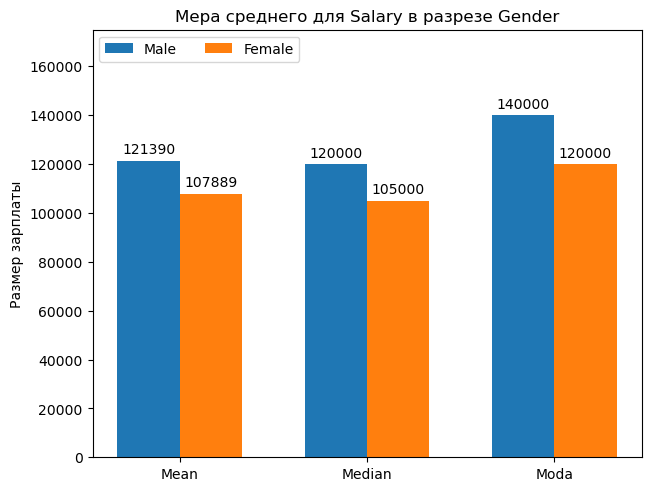



Разница между средней зарплатой : 13500.87 или 11.12%
-------------------------------------------------
Разница между медианной зарплатой : 15000.0 или 12.5%
-------------------------------------------------
Разница между модальной зарплатой : 20000.0 или 14.29%
-------------------------------------------------


In [29]:
feature = 'Gender'
values = ['Male', 'Female']
target = 'Salary'

avgs_dict = {}
for x in values:
  mean = df.loc[df[feature] == x][target].mean()
  median = df.loc[df[feature] == x][target].median()
  moda = df.loc[df[feature] == x][target].round().mode().tolist()[0]
  avgs_dict[x] = [mean, median, moda]

draw_compare_bar(avgs_dict, target, feature, len(values))

print('\n')

avgs_type = ['средней', 'медианной', 'модальной']
for i in range(3):
  diff = round((avgs_dict[values[0]][i] - avgs_dict[values[1]][i]), 2)
  diff_pecent = round(((avgs_dict[values[0]][i] - avgs_dict[values[1]][i]) / avgs_dict[values[0]][i] * 100), 2)
  print(f'Разница между {avgs_type[i]} зарплатой : {diff} или {diff_pecent}%')
  print('-------------------------------------------------')

# Из представленных данных можно сделать вывод, что зарплата мужчин в среднем
# превышает зарплату женщин

##### 3.4. На сколько сильно различаются между собой средние, медианные и модальные значения зарплаты в зависимости от уровня образования ?

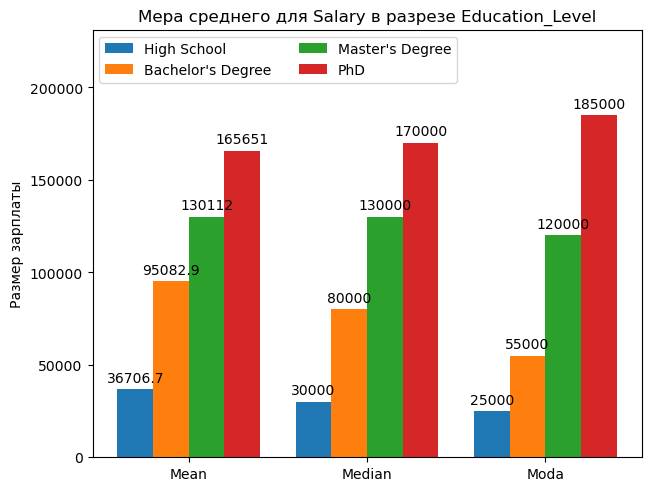

In [30]:
feature = 'Education_Level'
values = ['High School', "Bachelor's Degree", "Master's Degree", 'PhD']
target = 'Salary'

avgs_dict = {}
for x in values:
  mean = df.loc[df[feature] == x][target].mean()
  median = df.loc[df[feature] == x][target].median()
  moda = df.loc[df[feature] == x][target].round().mode().tolist()[0]
  avgs_dict[x] = [mean, median, moda]

draw_compare_bar(avgs_dict, target, feature, len(values))

# Из представленных данных можно сделать вывод, что c с повышением уровня
# образования, средние уровни зарплаты также растут

#### 4. Если данные содержат пропуски, заполните их и обоснуйте своё решение. Проверьте, как изменились базовые статистики до и после замены

In [31]:
# Проанализируем данные на наличие пустых значений:

for col in df.columns:
  null_count = df.loc[df[col].isnull()].shape[0]
  if (null_count > 0):
    print(f'В колонке {col} было найдено {null_count} пустых значений')

В колонке Age было найдено 2 пустых значений
В колонке Gender было найдено 2 пустых значений
В колонке Education_Level было найдено 3 пустых значений
В колонке Job_Title было найдено 2 пустых значений
В колонке Years_of_Experience было найдено 3 пустых значений
В колонке Salary было найдено 5 пустых значений


In [32]:
# Протестируем несколько вариантов замены пропущенных значений и посмотрим на
# изменение базовых статистик

columns = ['Age', 'Work_Exp', 'Salary']
df_test = df.rename(columns={'Years_of_Experience' : 'Work_Exp'})[columns].copy()


df_new = df_test.copy()

# Записываем базовые статистики неизмененного датасета
base_stat_df = df_new.describe().round(2).reset_index()

for col in columns:
  df_new[col] = df_new[col].fillna(round(df_new[col].mean(), 0))

# Записываем базовые статистики датасета, в котором пропущенные значения по
# каждой колонке заменены средним значением данной колонки
base_stat_df = base_stat_df.merge(df_new.describe().round(2).reset_index(),
                                  how='inner',
                                  on='index',
                                  suffixes=('', '_w_mean'))

df_new = df_test.copy()

for col in columns:
  df_new[col] = df_new[col].fillna(round(df_new[col].median(), 0))

# Записываем базовые статистики датасета, в котором пропущенные значения по
# каждой колонке заменены медианным значением данной колонки
base_stat_df = base_stat_df.merge(df_new.describe().round(2).reset_index(),
                                  how='inner',
                                  on='index',
                                  suffixes=('', '_w_median'))

df_new = df_test.copy()

for col in columns:
  df_new[col] = df_new[col].fillna(round(df_new[col].round(2).mode()[0], 0))

# Записываем базовые статистики датасета, в котором пропущенные значения по
# каждой колонке заменены модальным значением данной колонки
base_stat_df = base_stat_df.merge(df_new.describe().round(2).reset_index(),
                                  how='inner',
                                  on='index',
                                  suffixes=('', '_w_moda'))

base_stat_df.set_index('index', inplace=True)
base_stat_df = base_stat_df.reindex(columns=base_stat_df.columns.sort_values().tolist())

In [33]:
# Сравним базовые статистики при различных вариантах замены пропущенных значений

base_stat_df

,Age,Age_w_mean,Age_w_median,Age_w_moda,Salary,Salary_w_mean,Salary_w_median,Salary_w_moda,Work_Exp,Work_Exp_w_mean,Work_Exp_w_median,Work_Exp_w_moda
index,,,,,,,,,,,,
count,6702.00,6704.00,6704.00,6704.00,6699.00,6704.00,6704.00,6704.00,6701.00,6704.00,6704.00,6704.00
mean,33.62,33.62,33.62,33.62,115326.96,115326.96,115326.72,115345.37,8.09,8.09,8.09,8.09
std,7.61,7.61,7.61,7.61,52786.18,52766.49,52766.49,52770.79,6.06,6.06,6.06,6.06
min,21.00,21.00,21.00,21.00,350.00,350.00,350.00,350.00,0.00,0.00,0.00,0.00
25%,28.00,28.00,28.00,28.00,70000.00,70000.00,70000.00,70000.00,3.00,3.00,3.00,3.00
50%,32.00,32.00,32.00,32.00,115000.00,115000.00,115000.00,115000.00,7.00,7.00,7.00,7.00
75%,38.00,38.00,38.00,38.00,160000.00,160000.00,160000.00,160000.00,12.00,12.00,12.00,12.00
max,62.00,62.00,62.00,62.00,250000.00,250000.00,250000.00,250000.00,34.00,34.00,34.00,34.00


In [34]:
# Как можно видеть по данным из таблицы, представленной выше, независимо от
# выбранного варианта заполнения пропущенных значений, базовые метрики
# практически не менялись (в первую очередь потому, что пропущенных значений
# в каждом из столбцов было очень мало по сравнению с кол-вом данных в датасете)